In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
DATA_FOLDER = '../DATA/raw/sensors/'
files = os.listdir(DATA_FOLDER)

# Количество доступных станций мониторинга

In [3]:
start_dates_temp = []
start_dates_pd = []
for f in files:
    try:
        data = pd.read_csv(os.path.join(
            DATA_FOLDER, f), delimiter=';', parse_dates=['timestamp'])
        if 'sds' in f:
            start_dates_pd.append(data.timestamp.min())
        if 'bme' in f or 'dht' in f:
            start_dates_temp.append(data.timestamp.min())
    except ValueError:
        print(f)


34369_sds011_sensor_.csv
34370_bme280_sensor_.csv
22094_sds011_sensor_.csv


//home/anatoly/HDD/anaconda3/envs/mlforair/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


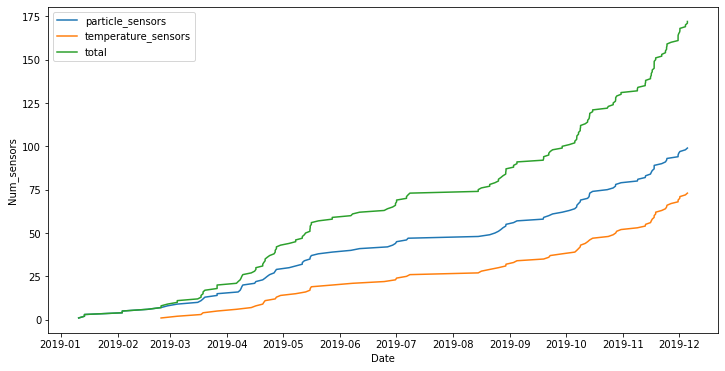

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(sorted(start_dates_pd), [
         i+1 for i in range(len(start_dates_pd))], label='particle_sensors')
plt.plot(sorted(start_dates_temp), [
         i+1 for i in range(len(start_dates_temp))], label='temperature_sensors')
plt.plot(sorted(start_dates_pd+start_dates_temp),
         [i+1 for i in range(len(start_dates_pd + start_dates_temp))], label='total')
plt.xlabel("Date")
plt.ylabel("Num_sensors")
plt.legend()

In [5]:
pd_data = pd.read_csv(os.path.join(
    DATA_FOLDER, '19836_sds011_sensor_.csv'), delimiter=';', parse_dates=['timestamp'], index_col=5)
temp_data = pd.read_csv(os.path.join(
    DATA_FOLDER, '24027_bme280_sensor_.csv'), delimiter=';', parse_dates=['timestamp'], index_col=5)

# Пример данных

Построим график показаний концентрации частиц и температуры для наиболее длинных доступных интервалов

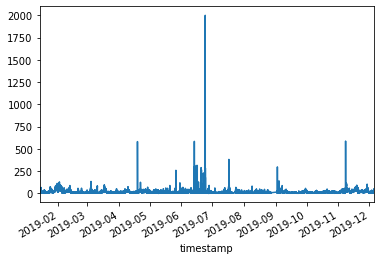

In [6]:
pd_data.P1.plot()

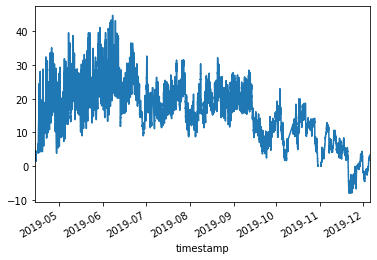

In [7]:
temp_data.temperature.plot()

In [8]:
temp_data.head()

,sensor_id,sensor_type,location,lat,lon,pressure,altitude,pressure_sealevel,temperature,humidity
timestamp,,,,,,,,,,
2019-04-14 00:29:19,24027,BME280,12229,55.724,37.563,1007.5,NaN,NaN,2.9,20.77
2019-04-14 00:30:20,24027,BME280,12229,55.724,37.563,1007.5,NaN,NaN,2.8,20.81
2019-04-14 00:31:19,24027,BME280,12229,55.724,37.563,1007.5,NaN,NaN,2.8,20.80
2019-04-14 00:32:19,24027,BME280,12229,55.724,37.563,1007.5,NaN,NaN,2.8,20.47
2019-04-14 00:44:17,24027,BME280,12229,55.724,37.563,1007.5,NaN,NaN,2.8,21.17


In [9]:
pd_data.head()

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2019-01-13 22:06:07,19836,SDS011,10079,55.74,37.662,16.00,NaN,NaN,7.67,NaN,NaN
2019-01-13 22:06:07,19836,SDS011,10079,55.74,37.662,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-13 22:08:35,19836,SDS011,10079,55.74,37.662,19.13,NaN,NaN,9.03,NaN,NaN
2019-01-13 22:11:03,19836,SDS011,10079,55.74,37.662,19.67,NaN,NaN,10.03,NaN,NaN
2019-01-13 22:13:31,19836,SDS011,10079,55.74,37.662,21.33,NaN,NaN,8.90,NaN,NaN


# Шаг по времени
Построим распределения максимального, минимального и среднего шага по времени среди всех датчиков

In [14]:
from pandas.errors import EmptyDataError
max_step = []
min_step = []
avg_step = []
for f in files:
    try:
        data = pd.read_csv(os.path.join(
                DATA_FOLDER, f), delimiter=';', parse_dates=['timestamp'])
        data['step'] = data.timestamp.diff(periods=1)
        max_step.append(data.step.max().total_seconds())
        min_step.append(data.step.min().total_seconds())
        avg_step.append(data.step.mean().total_seconds())
    except (EmptyDataError, ValueError):
        pass

//home/anatoly/HDD/anaconda3/envs/mlforair/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


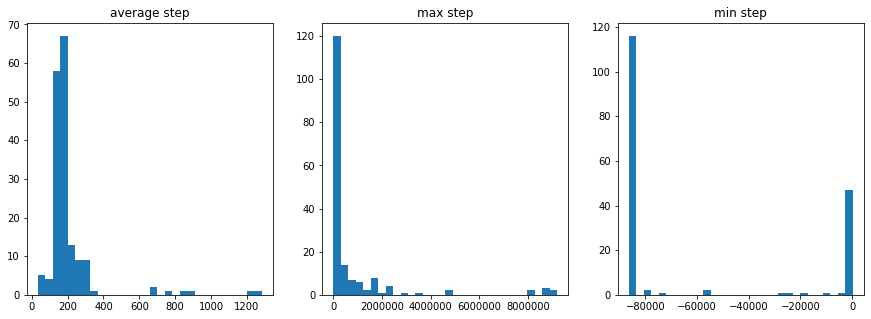

In [15]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
ax[0].hist(avg_step, bins=30)
ax[1].hist(max_step, bins=30)
ax[2].hist(min_step, bins=30)
ax[0].title.set_text("average step")
ax[1].title.set_text("max step")
ax[2].title.set_text("min step")